In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [5]:
#pip install codecs

ERROR: Could not find a version that satisfies the requirement codecs (from versions: none)
ERROR: No matching distribution found for codecs
Note: you may need to restart the kernel to use updated packages.


In [8]:
import codecs
with codecs.open("../Project-4/Resources/DataCoSupplyChainDataset_Original.csv", 'r', encoding='ISO-8859-1') as f:
    DataCO_df = pd.read_csv(f)


DataCO_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [9]:
DataCO_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [71]:
#drop non-beneficial columns

co_data = DataCO_df.copy()
FeatureList = ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode']
df_a = DataCO_df[FeatureList]
df_a.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [12]:
#Determine the number of unique values in each column
co_cat = df_a.dtypes.index.tolist()
df_a[co_cat].nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Id                       20652
Customer Segment                      3
Customer State                       46
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5
Order City                         3597
Order Country                       164
Order Customer Id                 20652
order date (DateOrders)           65752
Order Id                          65752


In [13]:
#Category Name
data_Category_Name=df_a.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Category_Name, x='Number of Orders',y = 'Category Name',color ='Number of Orders')

In [15]:
#Type of payment
df_payment_type=df_a.groupby([ 'Type'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_payment_type.head(10), x='Sales of Orders',y = 'Type',color ='Sales of Orders')

In [16]:
#Customer Segments
data_Customer_Segment=df_a.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)


In [72]:
#preprocessing
df_a.drop(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Category Id', 'Category Name', 'Customer City',
       'Customer Id', 'Customer Zipcode','Department Id', 'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Price',
       'shipping date (DateOrders)'], axis=1, inplace=True)
df_a

/var/folders/b7/jt29m60j4hd6pw18z289tgh40000gn/T/ipykernel_41967/2414915698.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Type,Delivery Status,Late_delivery_risk,Customer Country,Customer Segment,Customer State,Department Name,Latitude,Longitude,Market,Product Name,Shipping Mode
0,DEBIT,Advance shipping,0,Puerto Rico,Consumer,PR,Fitness,18.251453,-66.037056,Pacific Asia,Smart watch,Standard Class
1,TRANSFER,Late delivery,1,Puerto Rico,Consumer,PR,Fitness,18.279451,-66.037064,Pacific Asia,Smart watch,Standard Class
2,CASH,Shipping on time,0,EE. UU.,Consumer,CA,Fitness,37.292233,-121.881279,Pacific Asia,Smart watch,Standard Class
3,DEBIT,Advance shipping,0,EE. UU.,Home Office,CA,Fitness,34.125946,-118.291016,Pacific Asia,Smart watch,Standard Class
4,PAYMENT,Advance shipping,0,Puerto Rico,Corporate,PR,Fitness,18.253769,-66.037048,Pacific Asia,Smart watch,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,0,EE. UU.,Home Office,NY,Fan Shop,40.640930,-73.942711,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class
180515,DEBIT,Late delivery,1,EE. UU.,Corporate,CA,Fan Shop,35.362545,-119.018700,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,Second Class
180516,TRANSFER,Late delivery,1,EE. UU.,Corporate,CT,Fan Shop,41.629959,-72.967155,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class
180517,PAYMENT,Advance shipping,0,Puerto Rico,Consumer,PR,Fan Shop,18.213350,-66.370575,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class


In [73]:
df_a.drop(['Latitude','Longitude'], axis=1, inplace=True)
df_a

/var/folders/b7/jt29m60j4hd6pw18z289tgh40000gn/T/ipykernel_41967/1165201458.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Type,Delivery Status,Late_delivery_risk,Customer Country,Customer Segment,Customer State,Department Name,Market,Product Name,Shipping Mode
0,DEBIT,Advance shipping,0,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Smart watch,Standard Class
1,TRANSFER,Late delivery,1,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Smart watch,Standard Class
2,CASH,Shipping on time,0,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Smart watch,Standard Class
3,DEBIT,Advance shipping,0,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Smart watch,Standard Class
4,PAYMENT,Advance shipping,0,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Smart watch,Standard Class
...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,0,EE. UU.,Home Office,NY,Fan Shop,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class
180515,DEBIT,Late delivery,1,EE. UU.,Corporate,CA,Fan Shop,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,Second Class
180516,TRANSFER,Late delivery,1,EE. UU.,Corporate,CT,Fan Shop,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class
180517,PAYMENT,Advance shipping,0,Puerto Rico,Consumer,PR,Fan Shop,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class


In [55]:
# Convert categorical data to numeric with `pd.get_dummies`
dummied_df= pd.get_dummies(df_a)
dummied_df

,Late_delivery_risk,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Customer Country_EE. UU.,...,Product Name_adidas Brazuca 2014 Official Match Ball,Product Name_adidas Kids' F5 Messi FG Soccer Cleat,Product Name_adidas Men's F10 Messi TRX FG Soccer Cleat,Product Name_adidas Men's Germany Black Crest Away Tee,Product Name_adidas Youth Germany Black/Red Away Match Soc,Product Name_insta-bed Neverflat Air Mattress,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
180515,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
180516,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
180517,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
# Split our preprocessed data into our features and target arrays
y=dummied_df["Late_delivery_risk"]
x=dummied_df.drop(["Late_delivery_risk"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=78)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
#Compile, train, and test
import tensorflow as tf

2023-10-16 19:13:00.781666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

2023-10-16 19:14:16.407406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 1782      
                                                                 
 dense_1 (Dense)             (None, 18)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [35]:
#Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
4231/4231 [==============================] - 20s 4ms/step - loss: 0.0416 - accuracy: 0.9834
Epoch 2/100
4231/4231 [==============================] - 17s 4ms/step - loss: 0.0040 - accuracy: 0.9981
Epoch 3/100
4231/4231 [==============================] - 18s 4ms/step - loss: 0.0033 - accuracy: 0.9983
Epoch 4/100
4231/4231 [==============================] - 18s 4ms/step - loss: 0.0024 - accuracy: 0.9984
Epoch 5/100
4231/4231 [==============================] - 17s 4ms/step - loss: 0.0021 - accuracy: 0.9987
Epoch 6/100
4231/4231 [==============================] - 17s 4ms/step - loss: 0.0020 - accuracy: 0.9987
Epoch 7/100
4231/4231 [==============================] - 15s 4ms/step - loss: 0.0034 - accuracy: 0.9987
Epoch 8/100
4231/4231 [==============================] - 16s 4ms/step - loss: 5.2972e-04 - accuracy: 0.9999
Epoch 9/100
4231/4231 [==============================] - 16s 4ms/step - loss: 1.4897e-04 - accuracy: 1.0000
Epoch 10/100
4231/4231 [==============================] 

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1411/1411 - 17s - loss: 0.0019 - accuracy: 0.9999 - 17s/epoch - 12ms/step
Loss: 0.0019061659695580602, Accuracy: 0.9999335408210754


<Axes: >

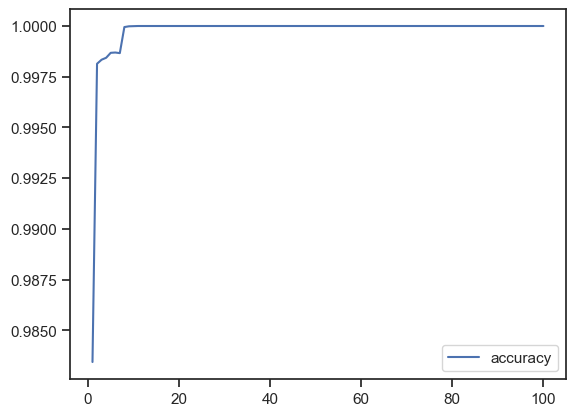

In [37]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [74]:
df_a.drop(['Delivery Status','Customer Country','Customer State','Product Name'], axis=1, inplace=True)
df_a

/var/folders/b7/jt29m60j4hd6pw18z289tgh40000gn/T/ipykernel_41967/481372882.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Type,Late_delivery_risk,Customer Segment,Department Name,Market,Shipping Mode
0,DEBIT,0,Consumer,Fitness,Pacific Asia,Standard Class
1,TRANSFER,1,Consumer,Fitness,Pacific Asia,Standard Class
2,CASH,0,Consumer,Fitness,Pacific Asia,Standard Class
3,DEBIT,0,Home Office,Fitness,Pacific Asia,Standard Class
4,PAYMENT,0,Corporate,Fitness,Pacific Asia,Standard Class
...,...,...,...,...,...,...
180514,CASH,0,Home Office,Fan Shop,Pacific Asia,Standard Class
180515,DEBIT,1,Corporate,Fan Shop,Pacific Asia,Second Class
180516,TRANSFER,1,Corporate,Fan Shop,Pacific Asia,Standard Class
180517,PAYMENT,0,Consumer,Fan Shop,Pacific Asia,Standard Class


In [63]:
df_Cust = df_a.drop(['Type','Department Name', 'Market', 'Shipping Mode'], axis=1, inplace=True)
df_Cust

/var/folders/b7/jt29m60j4hd6pw18z289tgh40000gn/T/ipykernel_41967/1425087389.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
dummy_1 = pd.get_dummies(df_a)
dummy_1

,Late_delivery_risk,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office
0,0,1,0,0
1,1,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
180514,0,0,0,1
180515,1,0,1,0
180516,1,0,1,0
180517,0,1,0,0


In [77]:
# Split our preprocessed data into our features and target arrays
y=dummy_1["Late_delivery_risk"]
x=dummy_1.drop(["Late_delivery_risk"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=78)

In [78]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [79]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 36        
                                                                 
 dense_7 (Dense)             (None, 18)                180       
                                                                 
 dense_8 (Dense)             (None, 1)                 19        
                                                                 
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [80]:
#Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [81]:
#Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
4231/4231 [==============================] - 25s 5ms/step - loss: 0.6887 - accuracy: 0.5482
Epoch 2/100
4231/4231 [==============================] - 20s 5ms/step - loss: 0.6886 - accuracy: 0.5487
Epoch 3/100
4231/4231 [==============================] - 19s 4ms/step - loss: 0.6885 - accuracy: 0.5487
Epoch 4/100
4231/4231 [==============================] - 19s 5ms/step - loss: 0.6885 - accuracy: 0.5487
Epoch 5/100
4231/4231 [==============================] - 21s 5ms/step - loss: 0.6885 - accuracy: 0.5487
Epoch 6/100
4231/4231 [==============================] - 19s 5ms/step - loss: 0.6885 - accuracy: 0.5487
Epoch 7/100
4231/4231 [==============================] - 21s 5ms/step - loss: 0.6884 - accuracy: 0.5487
Epoch 8/100
4231/4231 [==============================] - 19s 4ms/step - loss: 0.6885 - accuracy: 0.5487
Epoch 9/100
4231/4231 [==============================] - 20s 5ms/step - loss: 0.6884 - accuracy: 0.5487
Epoch 10/100
4231/4231 [==============================] - 19s 4m

In [82]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1411/1411 - 4s - loss: 0.6887 - accuracy: 0.5472 - 4s/epoch - 3ms/step
Loss: 0.6887302398681641, Accuracy: 0.5471969842910767


In [75]:
df_Shipmode = df_a.drop(['Type','Department Name', 'Market', 'Customer Segment'], axis=1, inplace=True)
df_Shipmode

/var/folders/b7/jt29m60j4hd6pw18z289tgh40000gn/T/ipykernel_41967/494700134.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
dummy2 = pd.get_dummies(df_a)
dummy2

,Late_delivery_risk,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,0,0,0,0,1
1,1,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
180514,0,0,0,0,1
180515,1,0,0,1,0
180516,1,0,0,0,1
180517,0,0,0,0,1


In [83]:
# Split our preprocessed data into our features and target arrays
y=dummy2["Late_delivery_risk"]
x=dummy2.drop(["Late_delivery_risk"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=78)

In [84]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [85]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 9)                 45        
                                                                 
 dense_10 (Dense)            (None, 18)                180       
                                                                 
 dense_11 (Dense)            (None, 1)                 19        
                                                                 
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________


In [86]:
#Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [87]:
#Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
4231/4231 [==============================] - 19s 4ms/step - loss: 0.5722 - accuracy: 0.6934
Epoch 2/100
4231/4231 [==============================] - 14s 3ms/step - loss: 0.5706 - accuracy: 0.6936
Epoch 3/100
4231/4231 [==============================] - 14s 3ms/step - loss: 0.5706 - accuracy: 0.6938
Epoch 4/100
4231/4231 [==============================] - 14s 3ms/step - loss: 0.5704 - accuracy: 0.6935
Epoch 5/100
4231/4231 [==============================] - 14s 3ms/step - loss: 0.5704 - accuracy: 0.6937
Epoch 6/100
4231/4231 [==============================] - 15s 3ms/step - loss: 0.5704 - accuracy: 0.6939
Epoch 7/100
4231/4231 [==============================] - 14s 3ms/step - loss: 0.5704 - accuracy: 0.6938
Epoch 8/100
4231/4231 [==============================] - 14s 3ms/step - loss: 0.5704 - accuracy: 0.6938
Epoch 9/100
4231/4231 [==============================] - 15s 4ms/step - loss: 0.5704 - accuracy: 0.6938
Epoch 10/100
4231/4231 [==============================] - 14s 3m

In [88]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1411/1411 - 4s - loss: 0.5656 - accuracy: 0.6994 - 4s/epoch - 3ms/step
Loss: 0.5656244158744812, Accuracy: 0.699379563331604
